## Logistic Regression

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math

df = pd.read_csv("titanictrain.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
len(df.index)

891

## Analyse data

<Axes: xlabel='Survived', ylabel='count'>

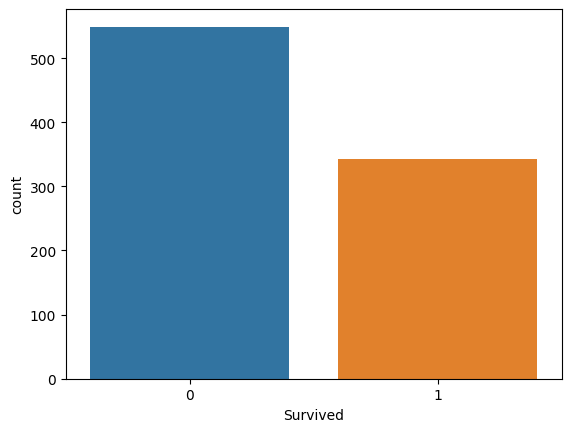

In [14]:
sns.countplot(x='Survived',data=df)

<Axes: xlabel='Survived', ylabel='count'>

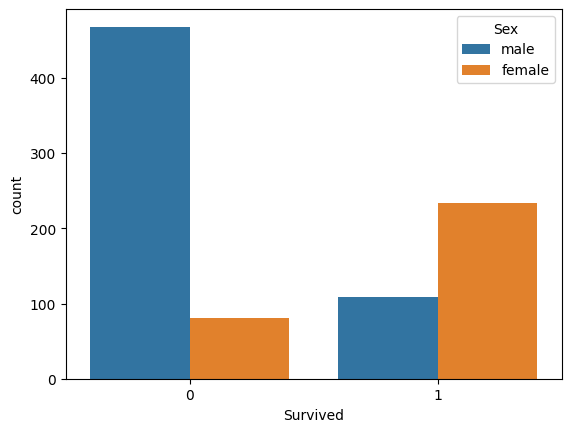

In [15]:
sns.countplot(x="Survived",hue="Sex",data=df)

<Axes: xlabel='Survived', ylabel='count'>

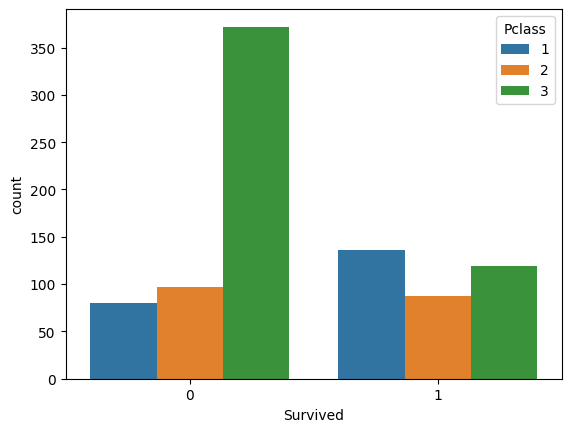

In [16]:
sns.countplot(x="Survived",hue="Pclass",data=df)

<Axes: xlabel='Age', ylabel='Count'>

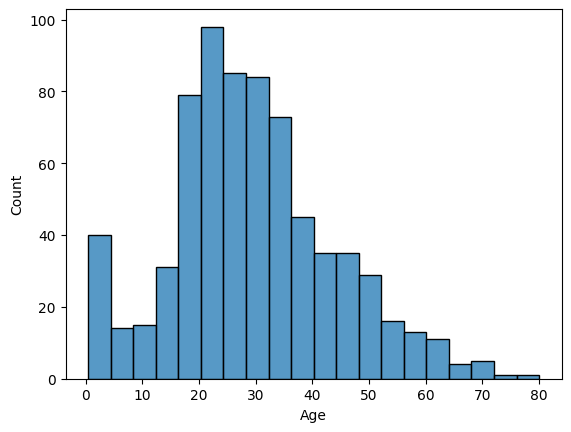

In [22]:
sns.histplot(x="Age",data=df)

C:\Users\diwak\AppData\Local\Temp\ipykernel_20756\687025345.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Fare"],bins=30)


<Axes: xlabel='Fare', ylabel='Density'>

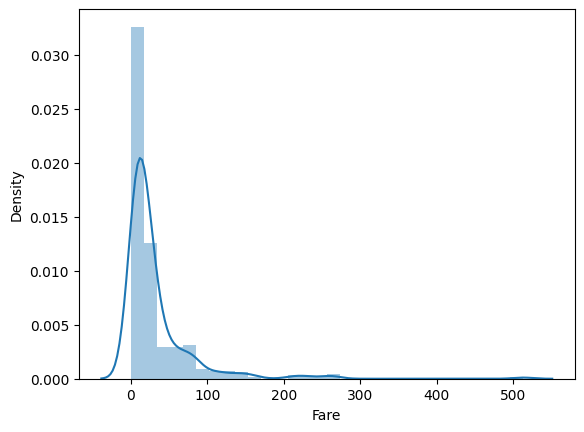

In [35]:
sns.distplot(df["Fare"],bins=30)

## Data Cleaning (Wrangling)

In [46]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

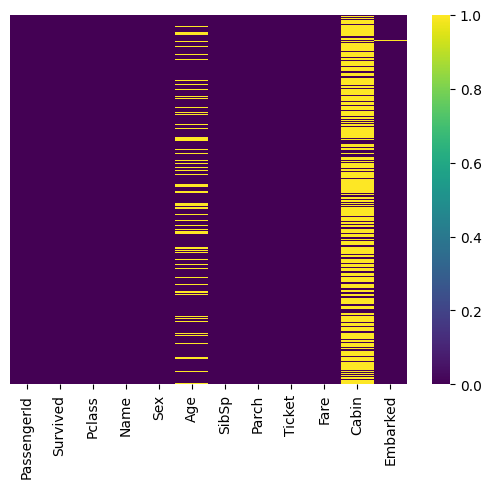

In [51]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")